In [1]:
from functions import *

/home/nico_ronzo/.local/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)
/home/nico_ronzo/.local/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
#import the data 
df = pd.read_csv('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/pump-sensor-data/sensor.csv',sep=',')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

Preprocess 

In [4]:
# set as index the timestamp and check for jump in the series 
# delete Unnamed: 0
df.index = pd.to_datetime(df['timestamp'])
df.drop(['timestamp','Unnamed: 0'], axis=1, inplace=True)
df = df.asfreq('1Min')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220320 entries, 2018-04-01 00:00:00 to 2018-08-31 23:59:00
Freq: T
Data columns (total 53 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   sensor_00       210112 non-null  float64
 1   sensor_01       219951 non-null  float64
 2   sensor_02       220301 non-null  float64
 3   sensor_03       220301 non-null  float64
 4   sensor_04       220301 non-null  float64
 5   sensor_05       220301 non-null  float64
 6   sensor_06       215522 non-null  float64
 7   sensor_07       214869 non-null  float64
 8   sensor_08       215213 non-null  float64
 9   sensor_09       215725 non-null  float64
 10  sensor_10       220301 non-null  float64
 11  sensor_11       220301 non-null  float64
 12  sensor_12       220301 non-null  float64
 13  sensor_13       220301 non-null  float64
 14  sensor_14       220299 non-null  float64
 15  sensor_15       0 non-null       float64
 16  sensor_16     

Exploratory Data Analysis of Sensor Data: 

visualize the amount of missing in each sensor and look more in details  sensors with a percentage of missing greater than 5%.  

In [5]:
# missing value percentage
round((df.isnull().sum() * 100/ len(df)),2)

sensor_00           4.63
sensor_01           0.17
sensor_02           0.01
sensor_03           0.01
sensor_04           0.01
sensor_05           0.01
sensor_06           2.18
sensor_07           2.47
sensor_08           2.32
sensor_09           2.09
sensor_10           0.01
sensor_11           0.01
sensor_12           0.01
sensor_13           0.01
sensor_14           0.01
sensor_15         100.00
sensor_16           0.01
sensor_17           0.02
sensor_18           0.02
sensor_19           0.01
sensor_20           0.01
sensor_21           0.01
sensor_22           0.02
sensor_23           0.01
sensor_24           0.01
sensor_25           0.02
sensor_26           0.01
sensor_27           0.01
sensor_28           0.01
sensor_29           0.03
sensor_30           0.12
sensor_31           0.01
sensor_32           0.03
sensor_33           0.01
sensor_34           0.01
sensor_35           0.01
sensor_36           0.01
sensor_37           0.01
sensor_38           0.01
sensor_39           0.01


sensor 15 present 100% of missing values. It must be removed. 

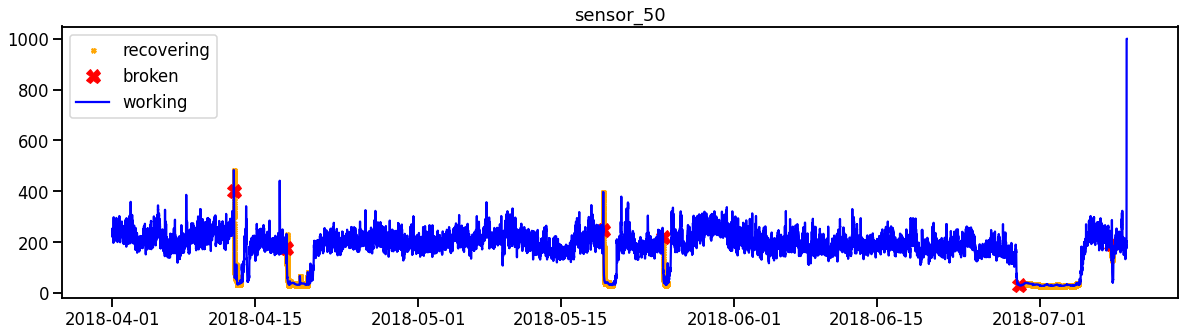

In [6]:
# further look at sensor 50 
# sensor_50 data with machine status
Broken = df[df['machine_status']=='BROKEN']
Recovery = df[df['machine_status']=='RECOVERING']


# control the scaling of plot element
sns.set_context('talk')
_ = plt.figure(figsize=(20,5))
_ = plt.plot(Recovery['sensor_50'], linestyle='none', marker='X', color='orange', markersize=5, label='recovering')
_ = plt.plot(Broken['sensor_50'], linestyle='none', marker='X', color='red', markersize=14, label='broken')
_ = plt.plot(df['sensor_50'], color='blue', label='working')
_ = plt.title('sensor_50')
_ =plt.legend()
plt.show()

In [7]:
#df.loc[pd.isna(df["sensor_50"]), :].index

sensor 50 does not contain data after 2018-04-27 17:53 (76997 entries are missing) make sense to remove it from the dataset. 

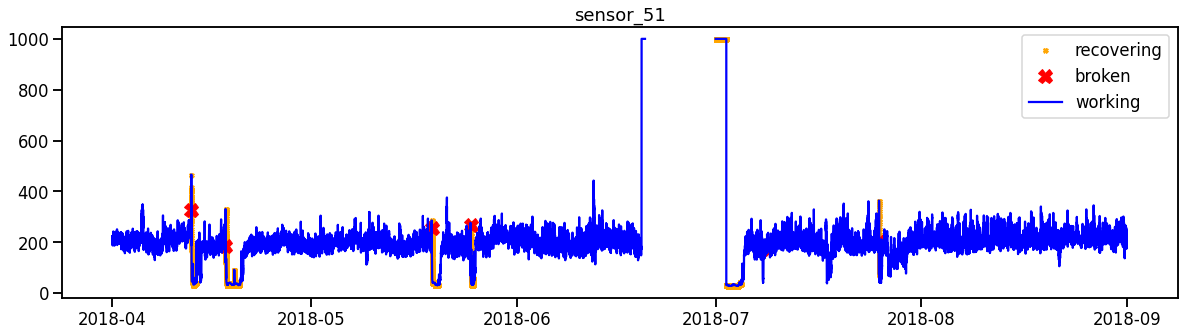

In [8]:
# further look at sensor 51
# control the scaling of plot element
sns.set_context('talk')
_ = plt.figure(figsize=(20,5))
_ = plt.plot(Recovery['sensor_51'], linestyle='none', marker='X', color='orange', markersize=5, label='recovering')
_ = plt.plot(Broken['sensor_51'], linestyle='none', marker='X', color='red', markersize=14, label='broken')
_ = plt.plot(df['sensor_51'], color='blue', label='working')
_ = plt.title('sensor_51')
_ =plt.legend()
plt.show()

In [9]:
#df.loc[pd.isna(df["sensor_51"]), :].index

sensor 51 does not contain data between 2018-05-31 and 2018-07-01. (15354 entries are missing) make sense to remove it from the dataset. 

In [10]:
#remove sensors: 00,15,50,51
df = df.drop(['sensor_15','sensor_50','sensor_51'], axis = 1)
df.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,NORMAL


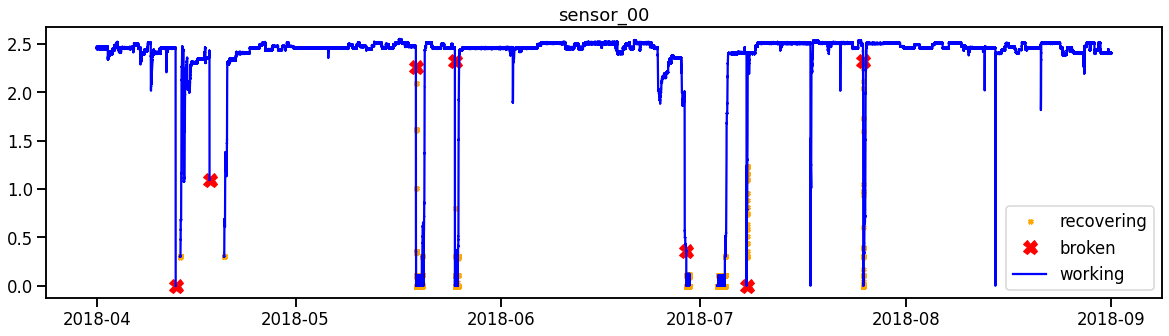

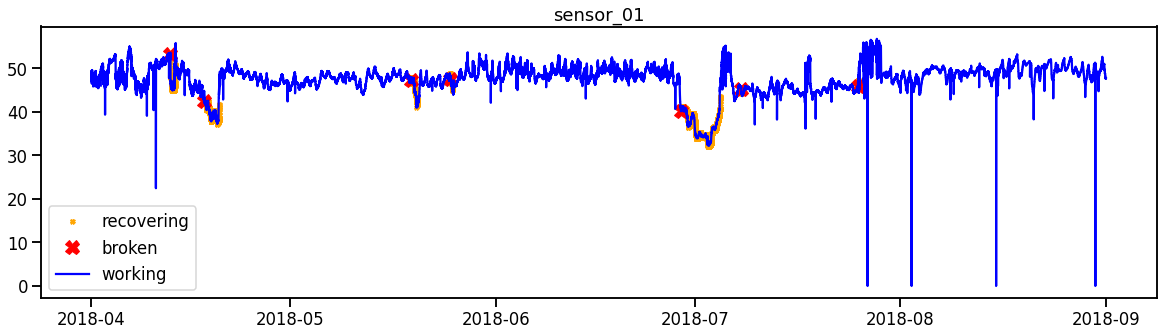

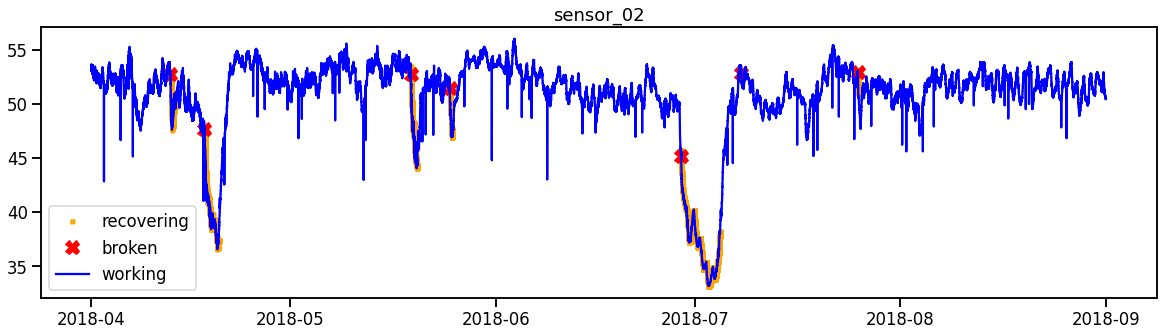

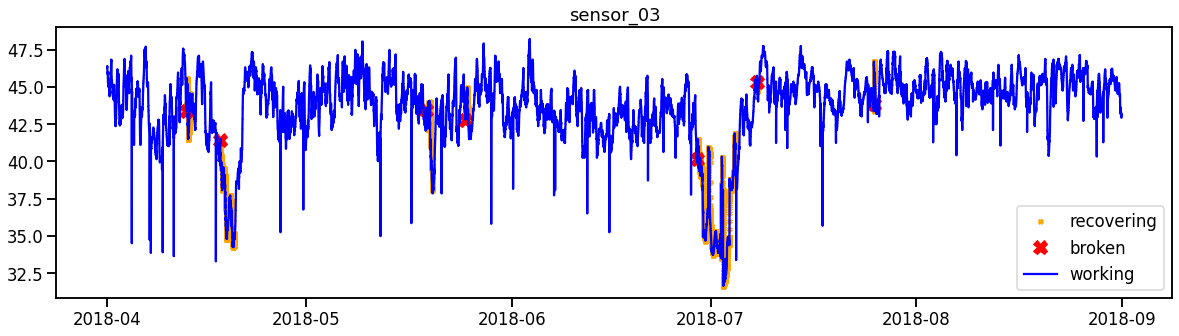

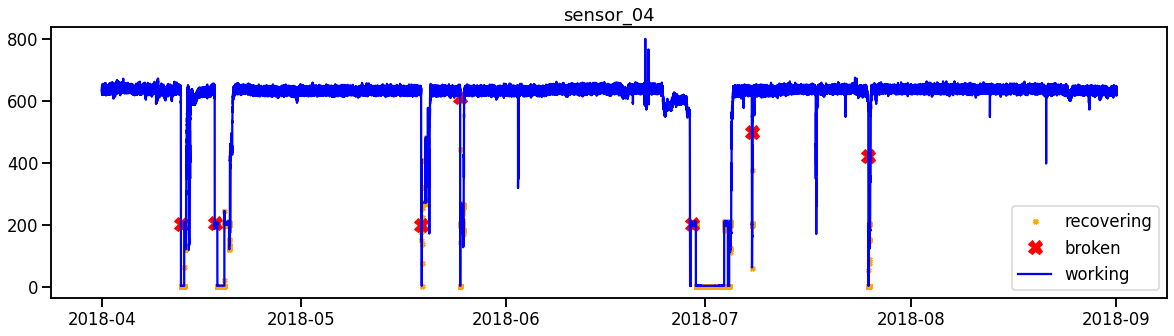

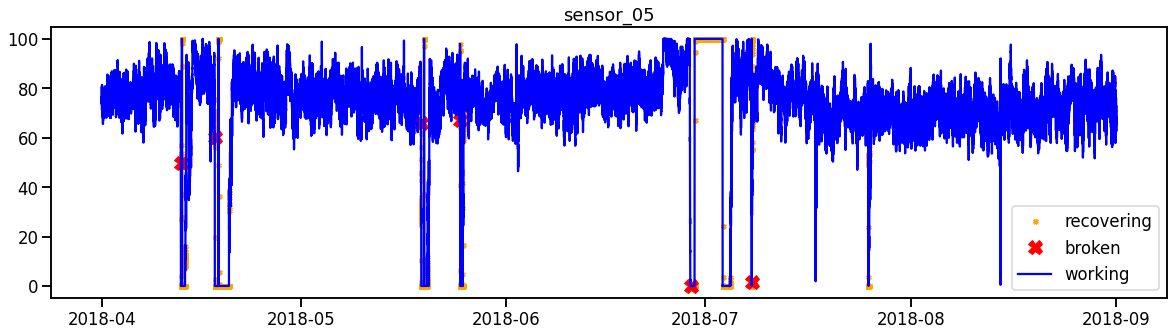

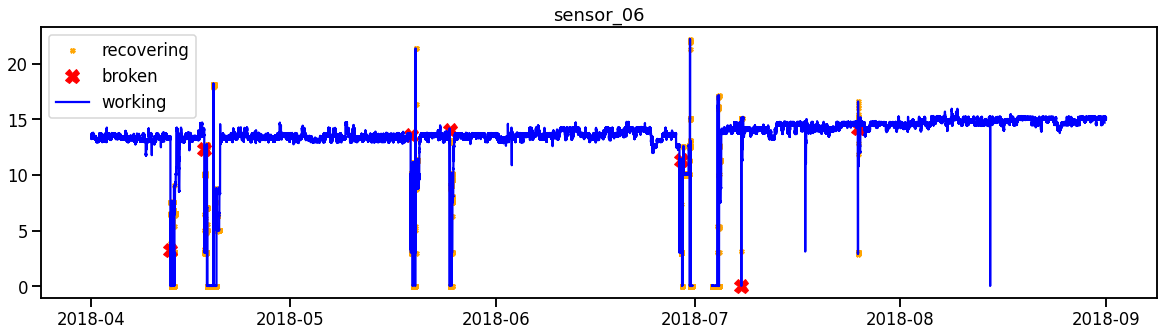

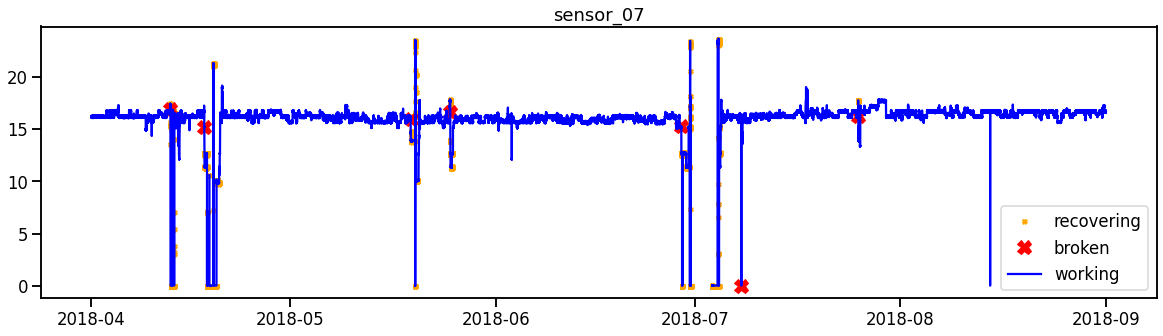

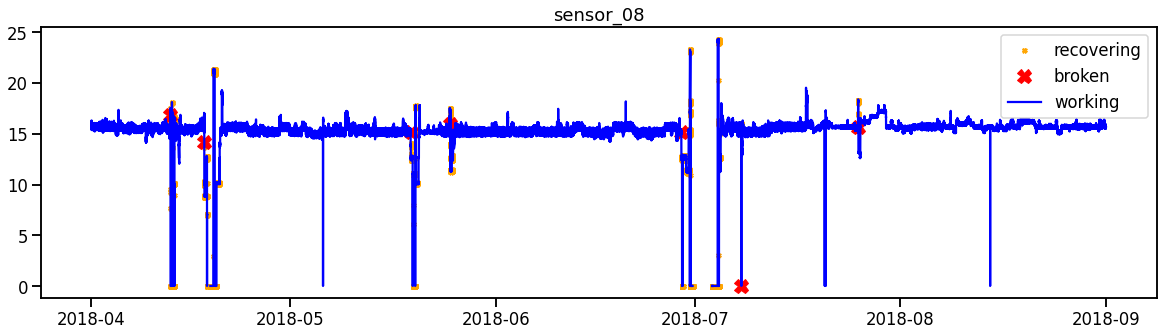

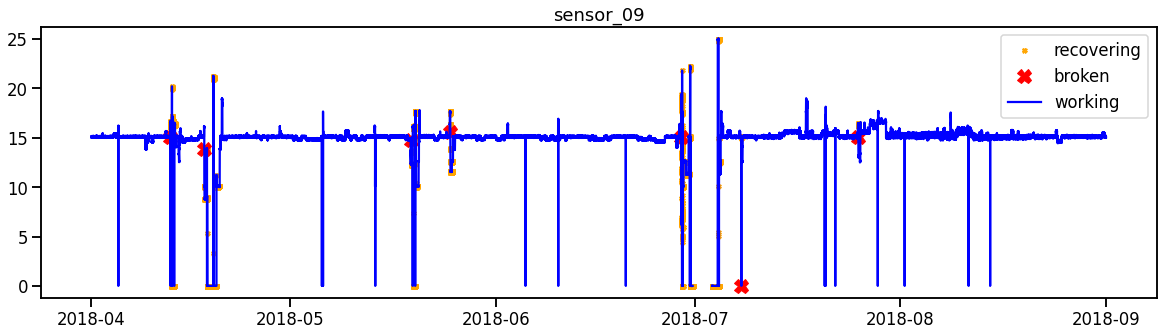

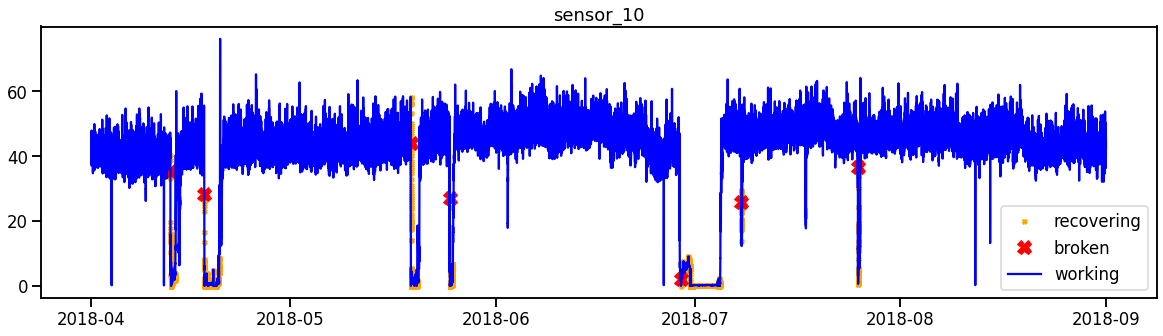

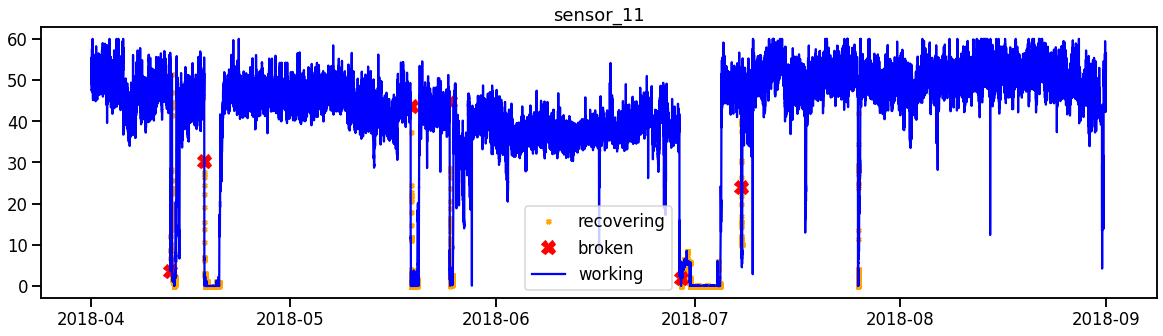

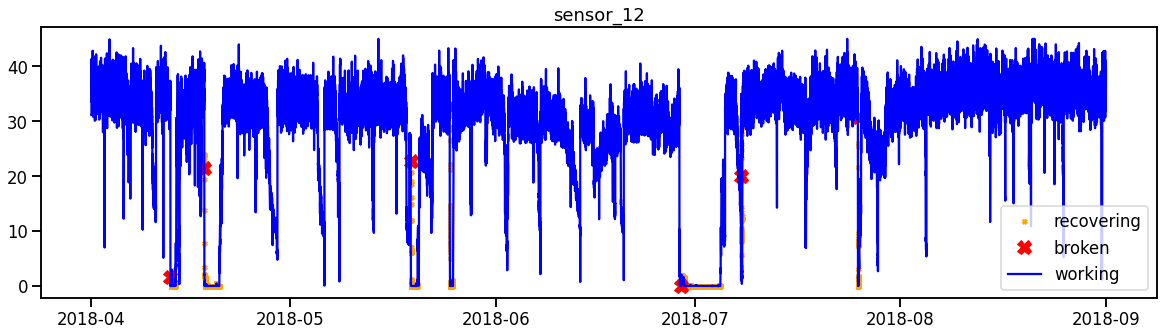

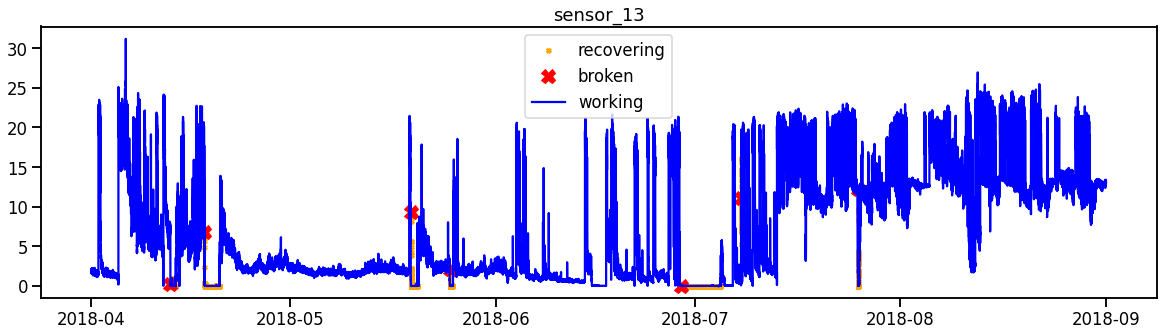

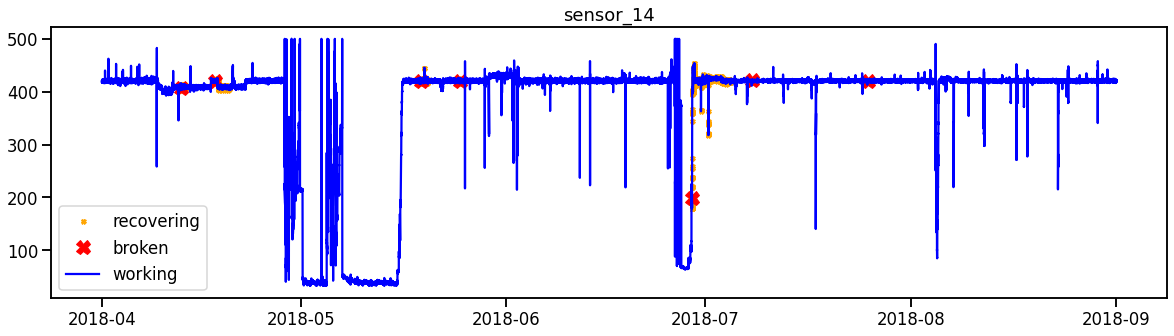

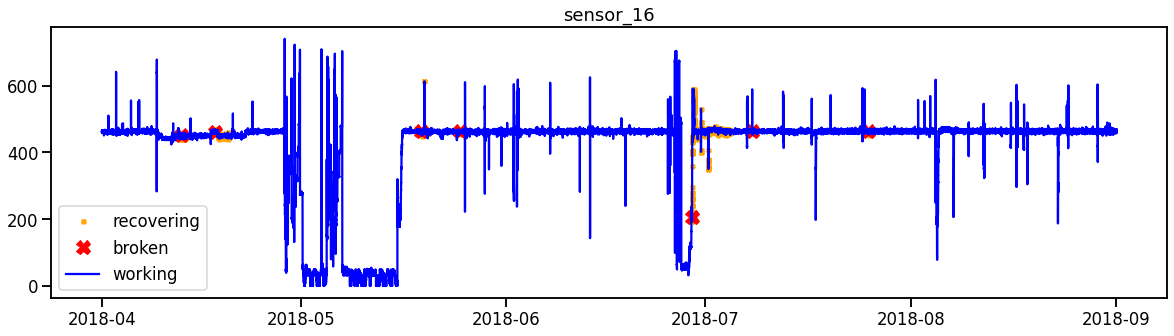

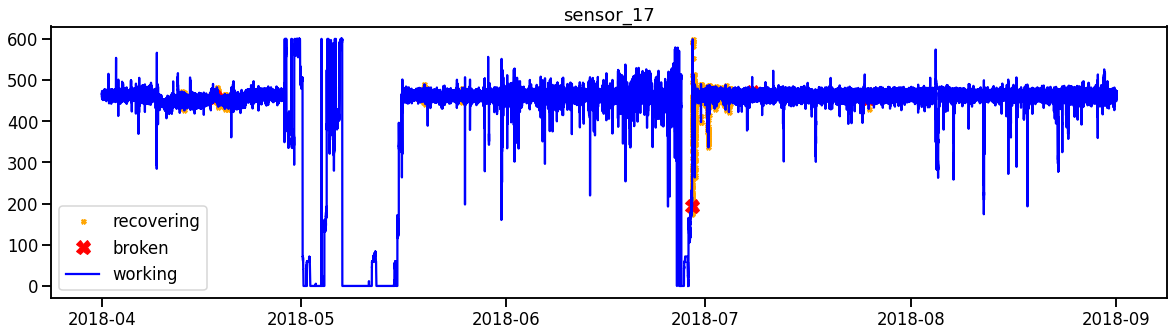

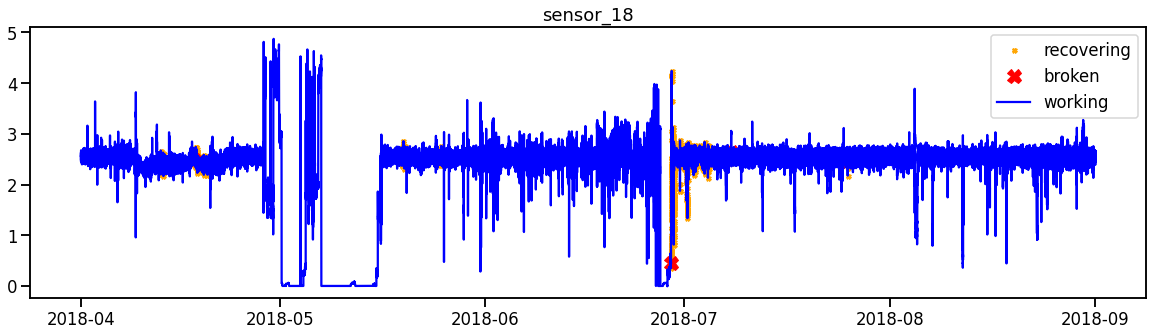

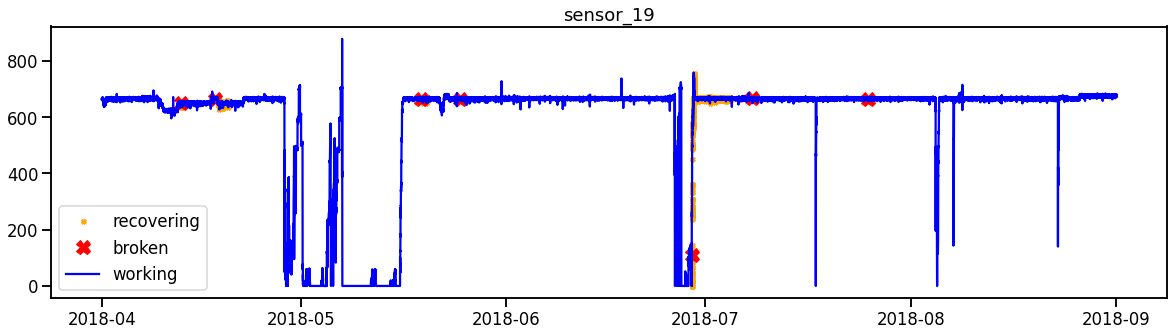

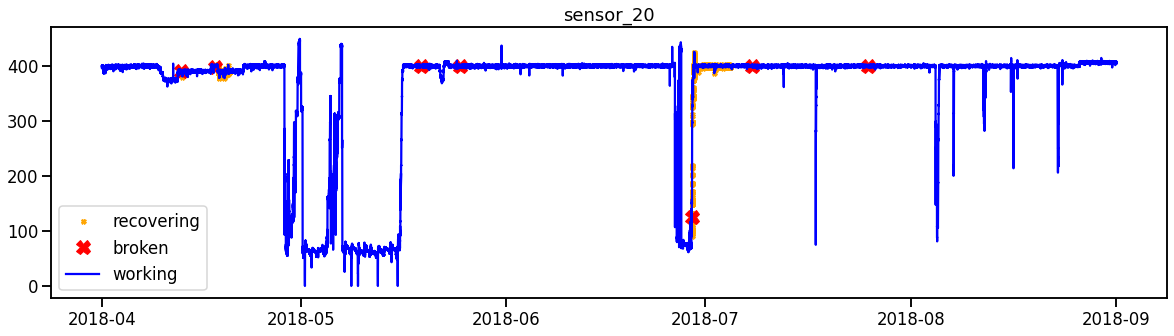

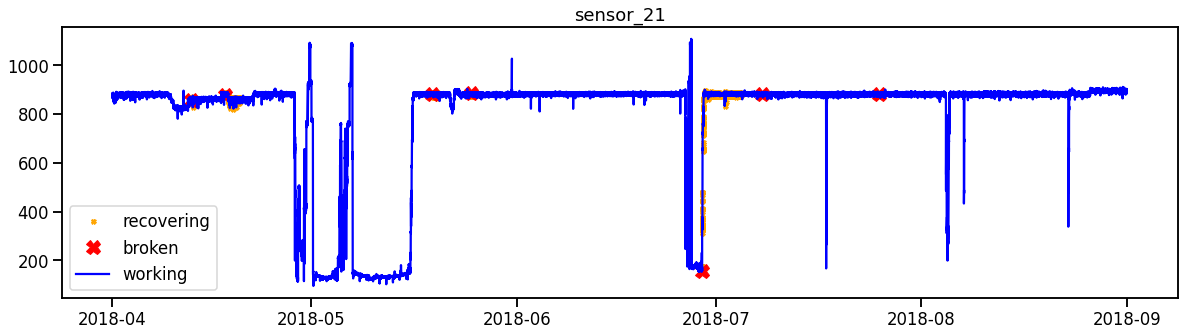

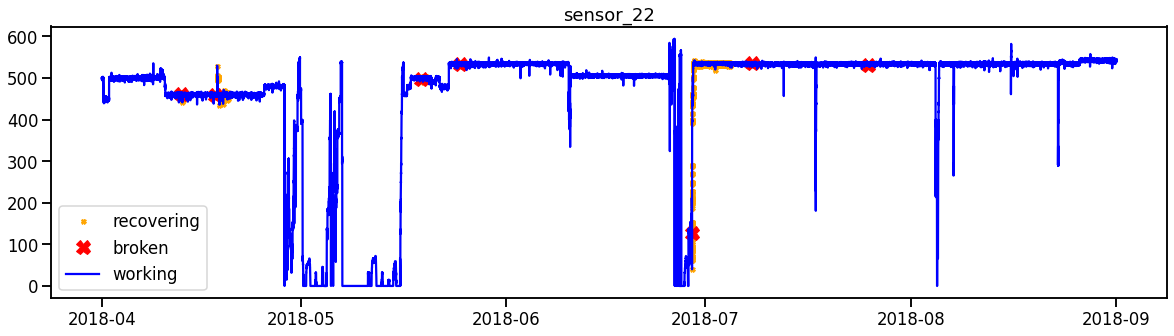

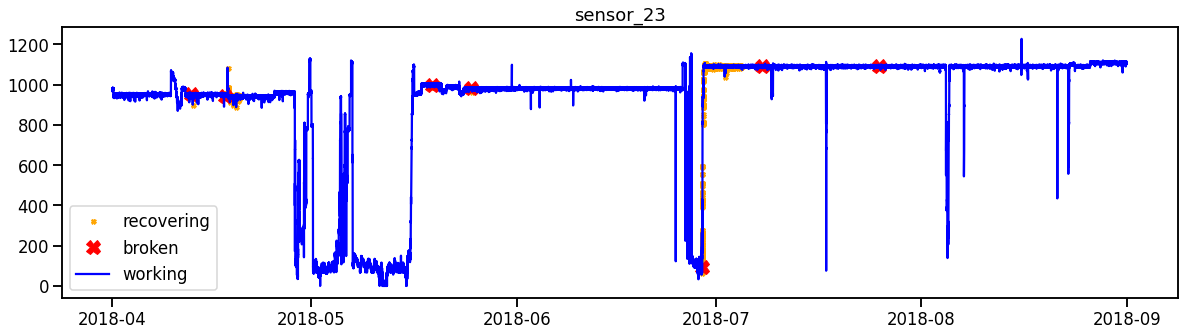

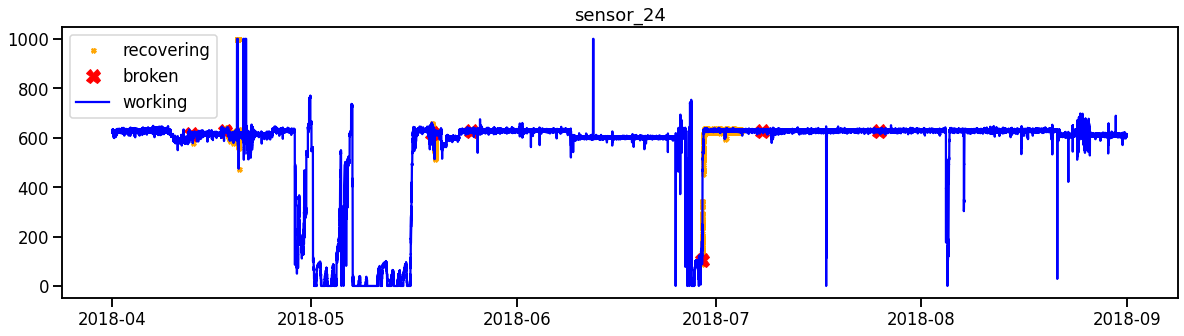

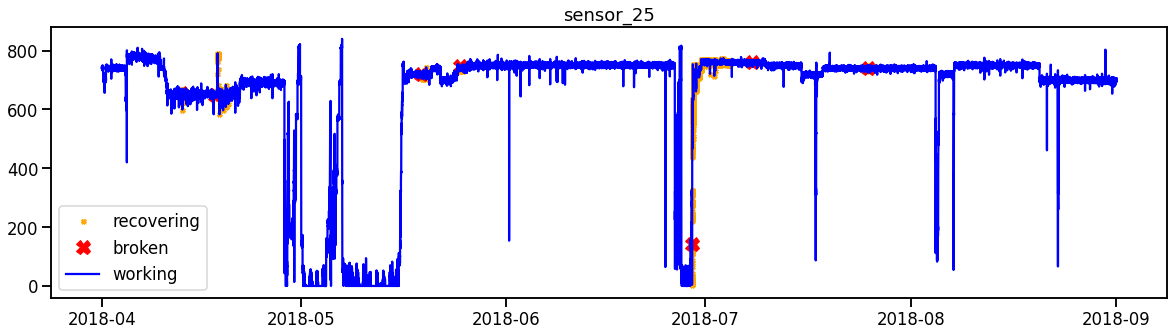

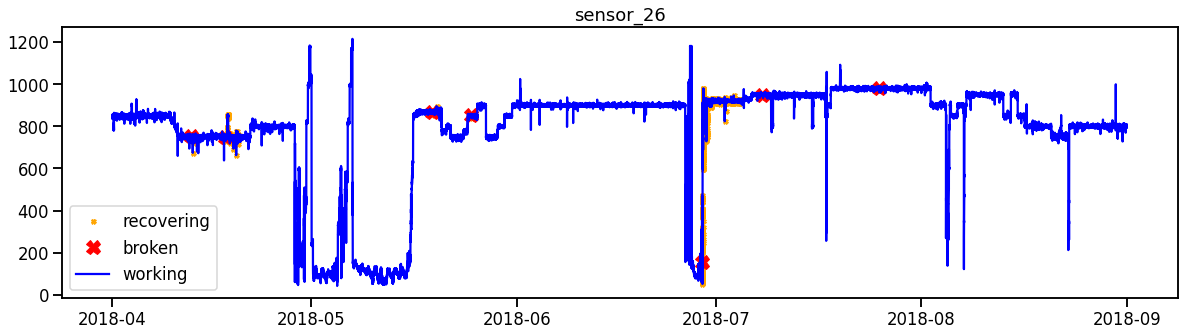

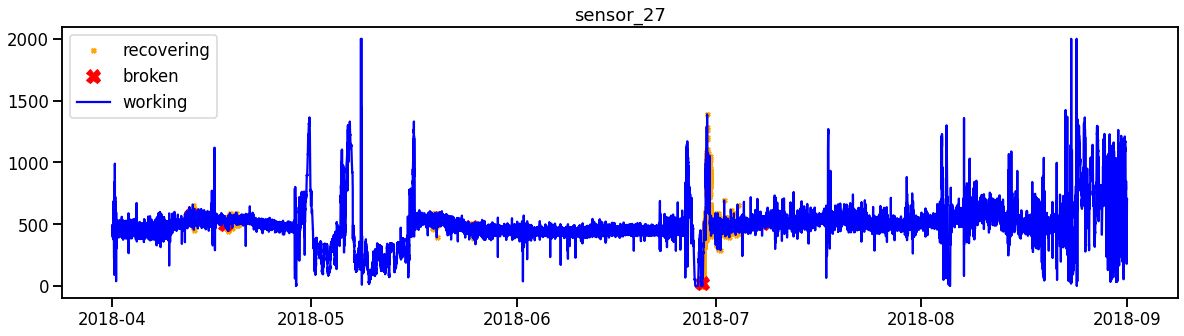

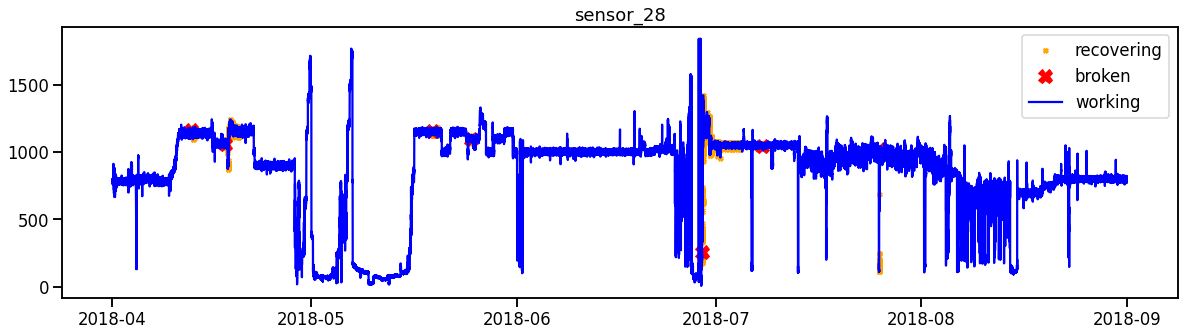

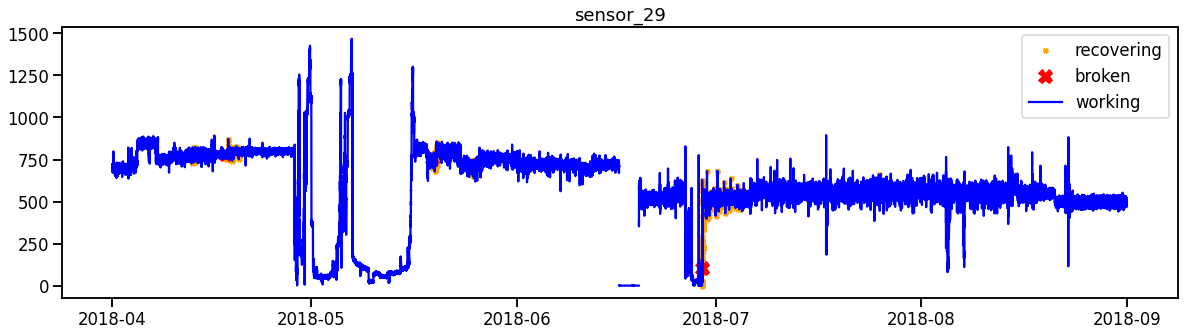

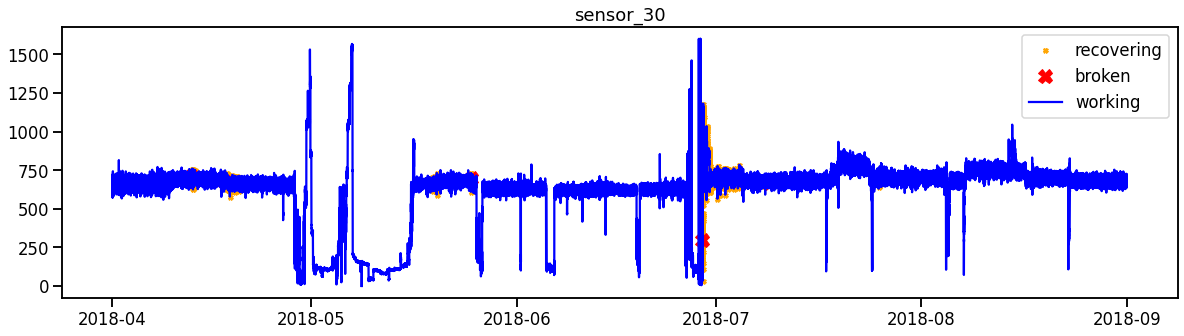

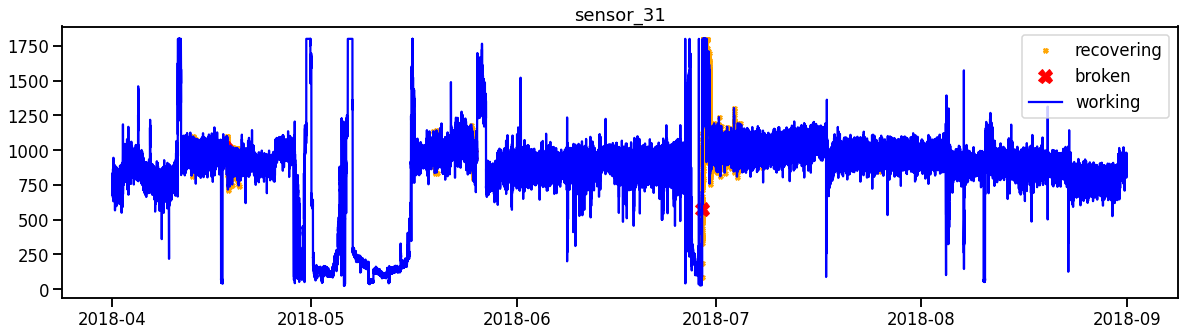

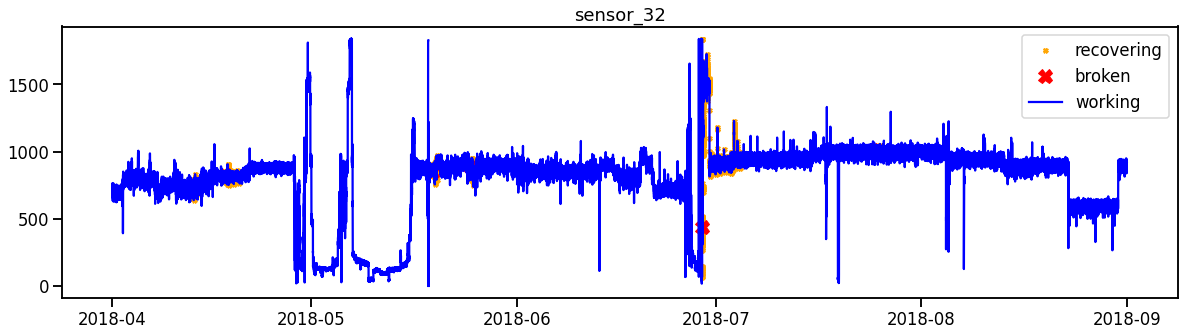

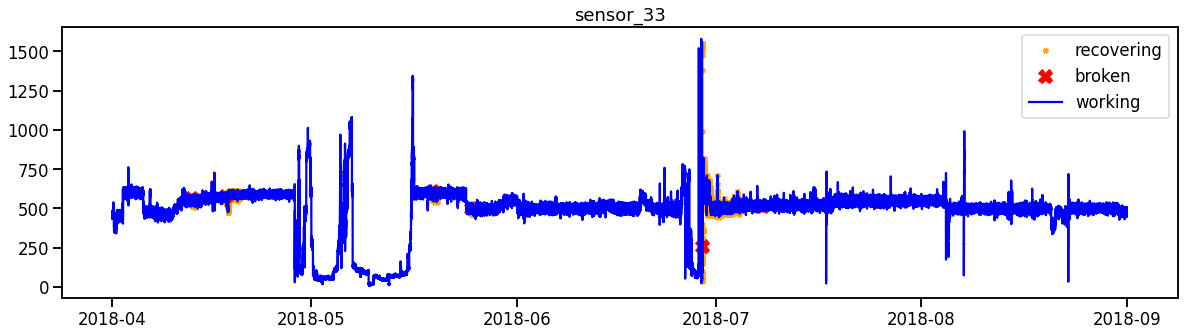

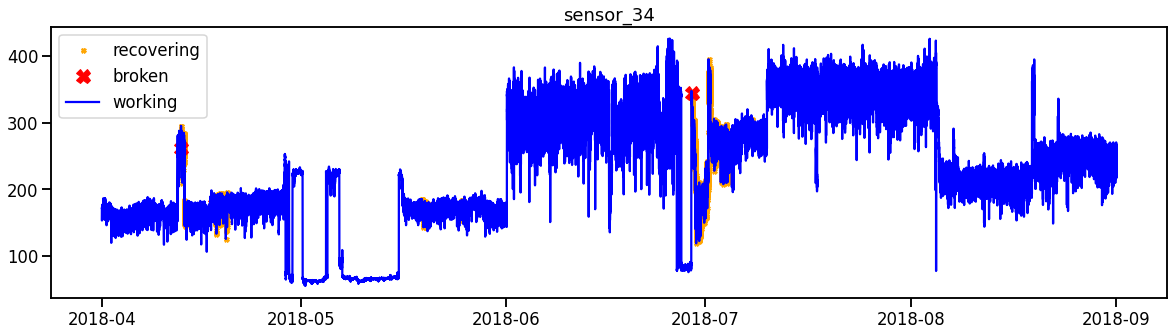

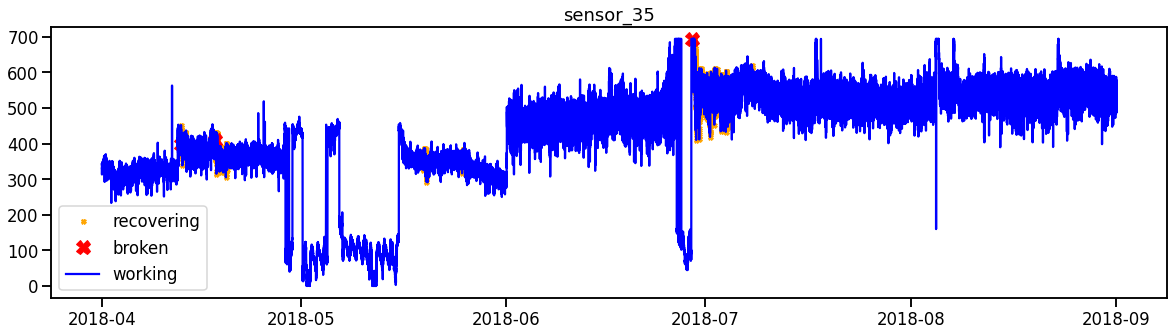

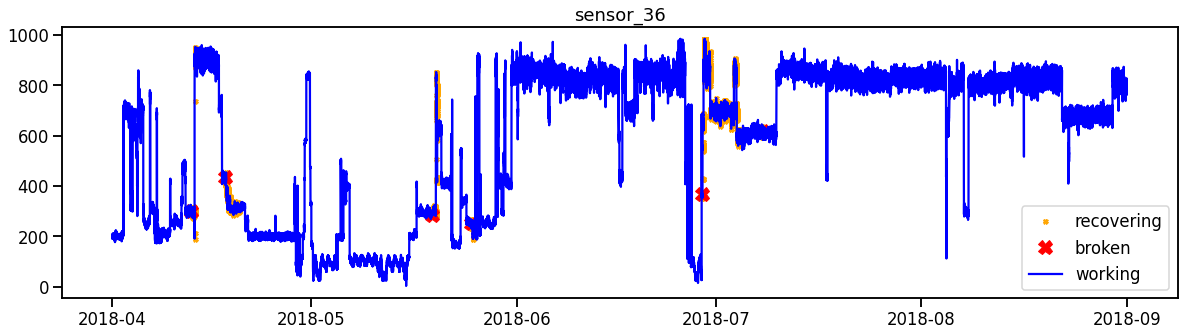

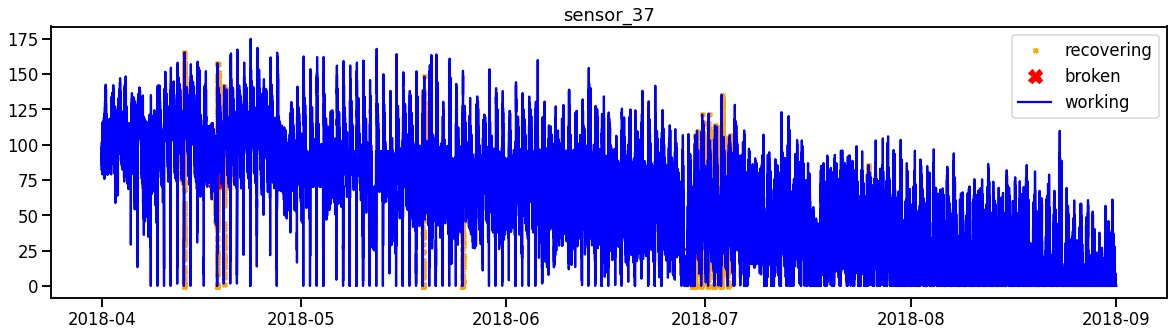

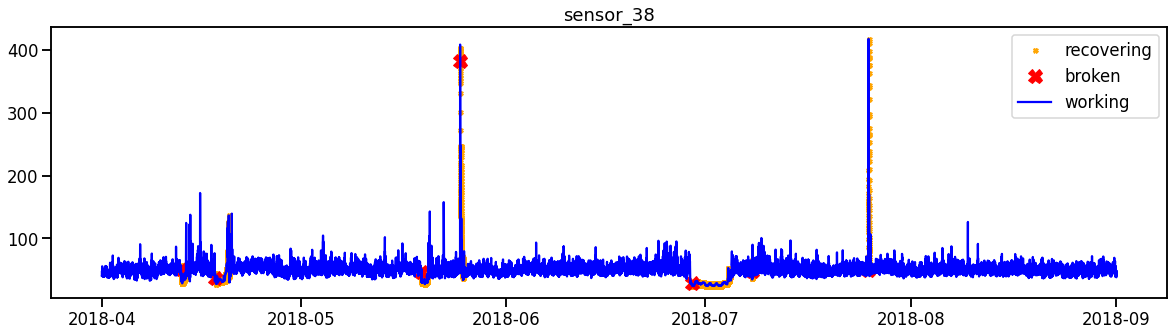

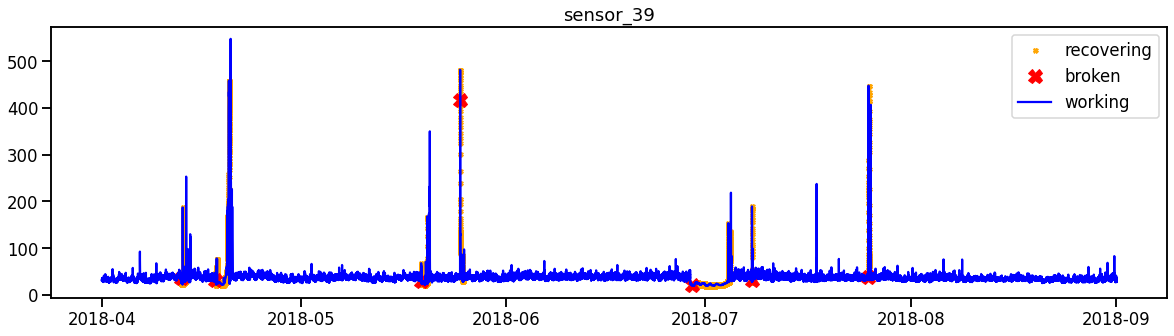

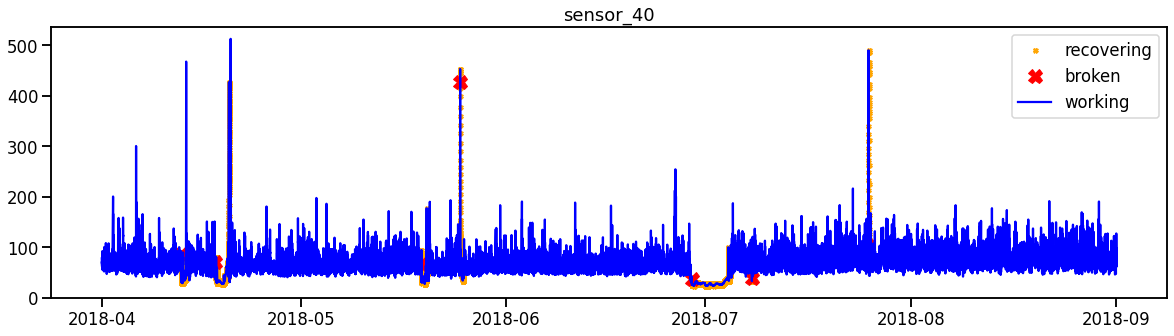

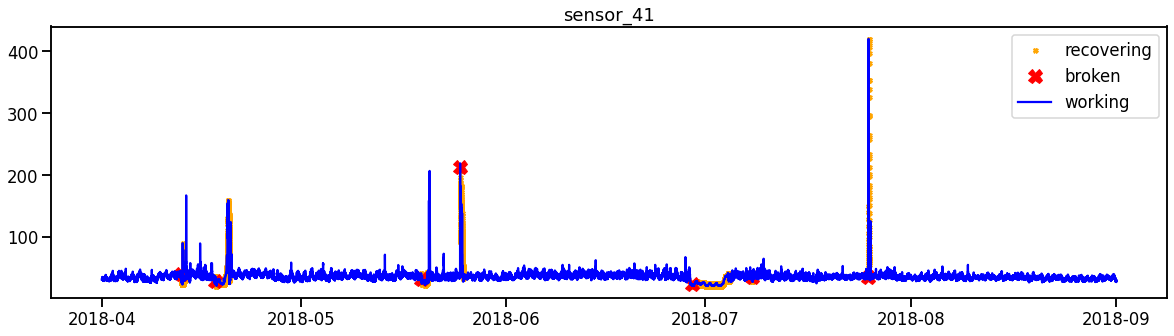

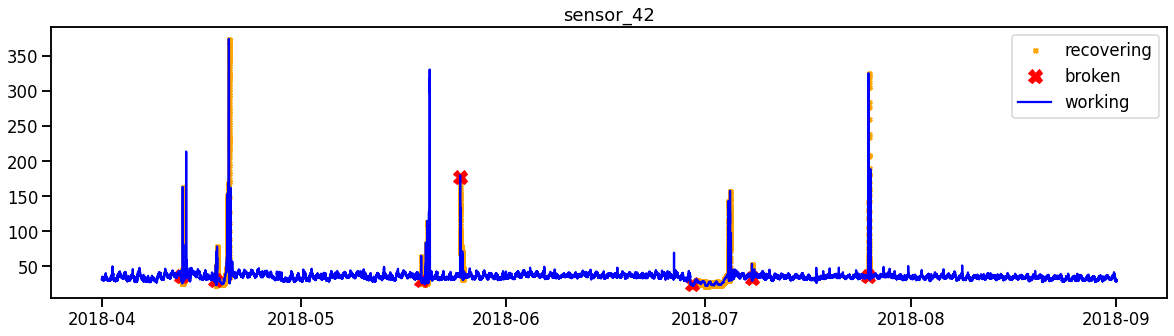

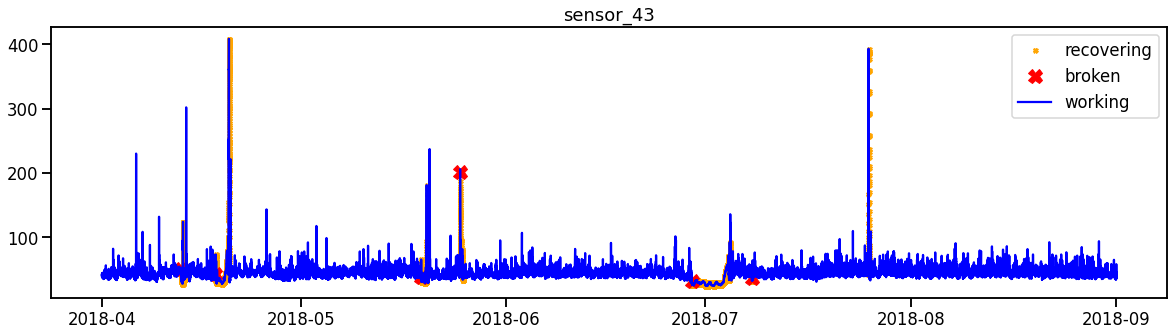

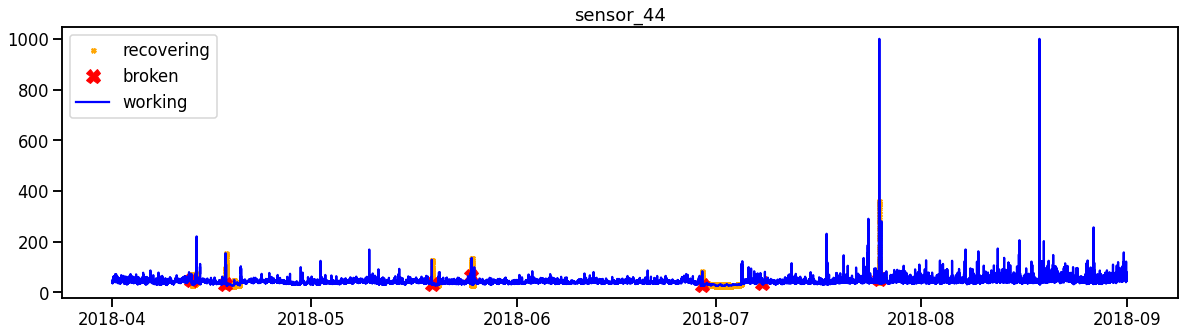

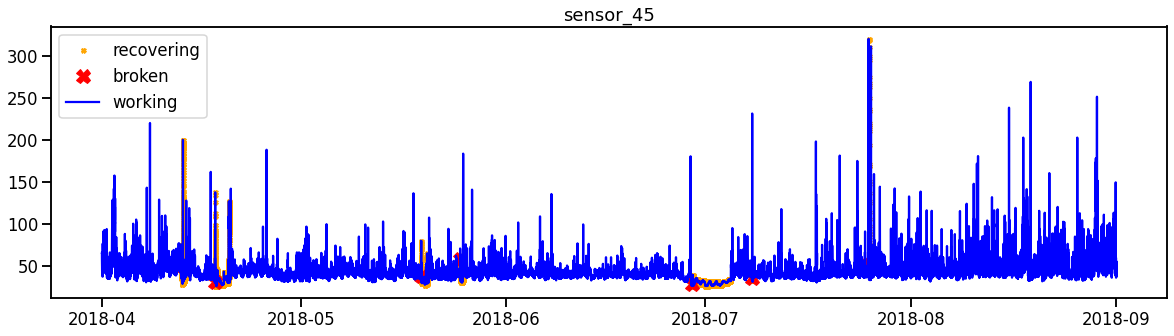

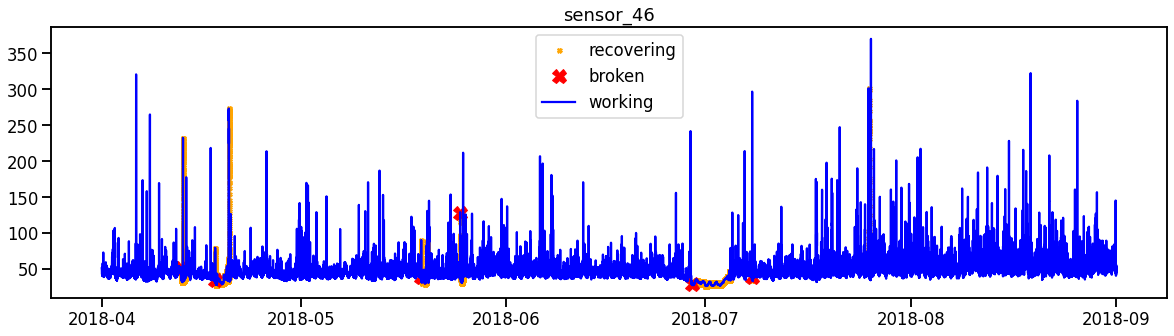

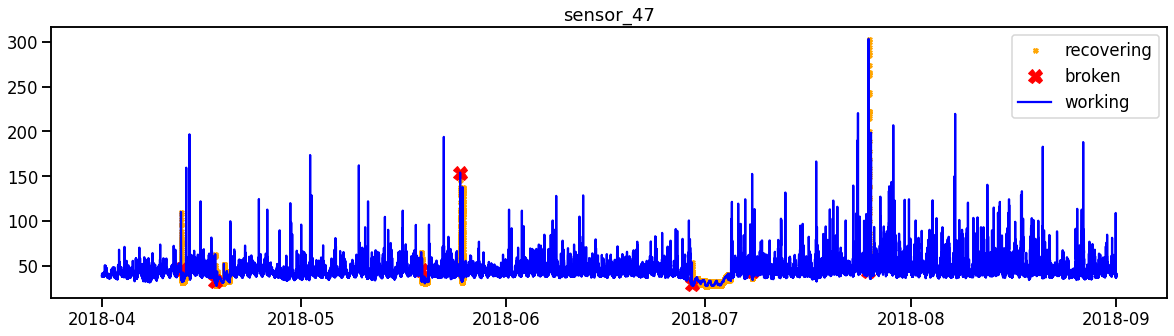

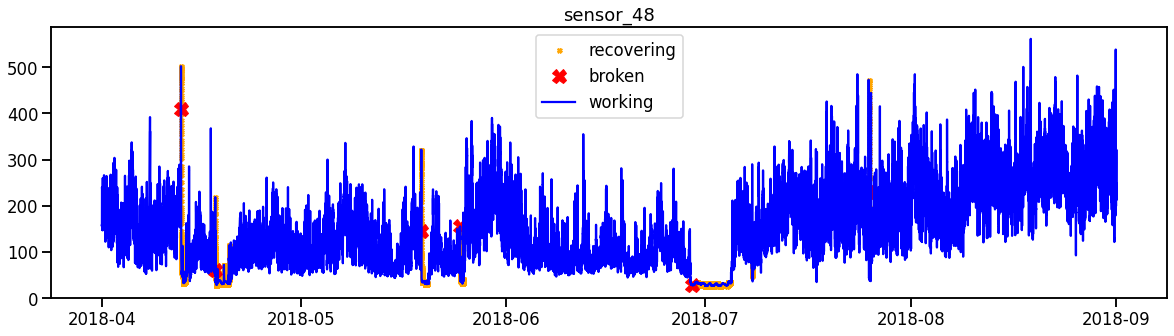

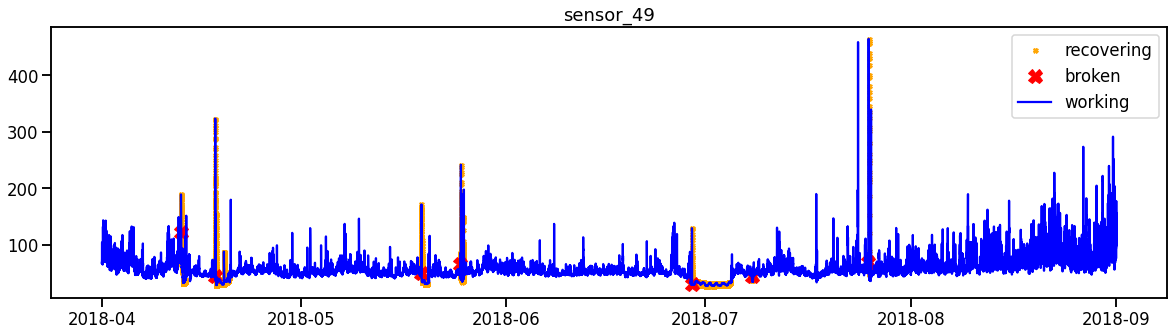

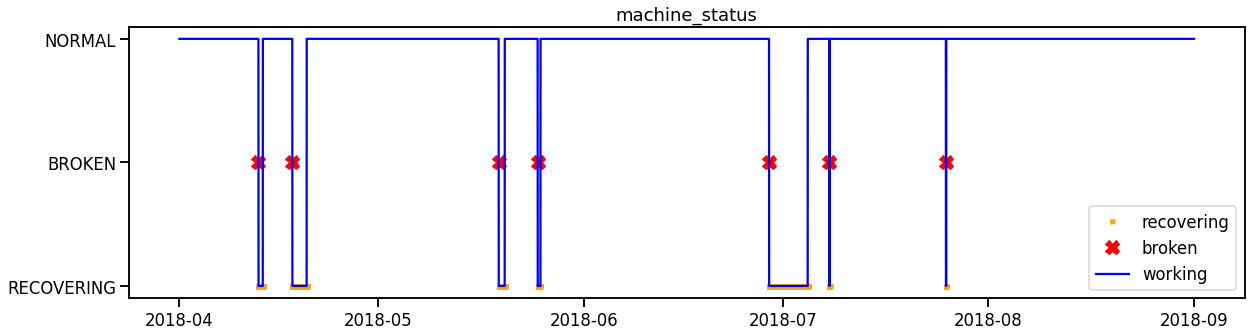

In [11]:
# sensor data with machine status
Sensors = df.iloc[:,0:50]
sensorNames=Sensors.columns
for sensor in sensorNames:
    sns.set_context('talk')
    _ = plt.figure(figsize=(20,5))
    _ = plt.plot(Recovery[sensor], linestyle='none', marker='X', color='orange', markersize=5, label='recovering')
    _ = plt.plot(Broken[sensor], linestyle='none', marker='X', color='red', markersize=14, label='broken')
    _ = plt.plot(df[sensor], color='blue', label='working')
    _ = plt.title(sensor)
    _ =plt.legend()
    plt.show()
    
    

In [12]:
# look when the sensor has missing values

pd.set_option('display.max_seq_items', 50000)
df.loc[pd.isna(df["sensor_49"]), :].index

DatetimeIndex(['2018-04-18 10:32:00', '2018-04-27 17:48:00',
               '2018-04-27 17:49:00', '2018-04-27 17:50:00',
               '2018-04-27 17:51:00', '2018-04-27 17:52:00',
               '2018-04-27 17:53:00', '2018-04-27 17:54:00',
               '2018-04-27 17:55:00', '2018-05-31 23:52:00',
               '2018-05-31 23:53:00', '2018-05-31 23:54:00',
               '2018-05-31 23:55:00', '2018-05-31 23:56:00',
               '2018-05-31 23:57:00', '2018-05-31 23:58:00',
               '2018-05-31 23:59:00', '2018-07-03 15:35:00',
               '2018-07-03 15:53:00', '2018-07-04 13:57:00',
               '2018-07-04 15:05:00', '2018-07-11 09:12:00',
               '2018-07-11 09:13:00', '2018-07-11 09:14:00',
               '2018-08-31 18:48:00', '2018-08-31 18:49:00',
               '2018-08-31 18:50:00'],
              dtype='datetime64[ns]', name='timestamp', freq=None)

In [13]:
#print(df.loc[df['sensor_29']<=100].index)

In [14]:
#period when machine is in recovery phase

print(df.loc[df['machine_status']=='NORMAL'].index)

DatetimeIndex(['2018-04-01 00:00:00', '2018-04-01 00:01:00',
               '2018-04-01 00:02:00', '2018-04-01 00:03:00',
               '2018-04-01 00:04:00', '2018-04-01 00:05:00',
               '2018-04-01 00:06:00', '2018-04-01 00:07:00',
               '2018-04-01 00:08:00', '2018-04-01 00:09:00',
               ...
               '2018-08-31 23:50:00', '2018-08-31 23:51:00',
               '2018-08-31 23:52:00', '2018-08-31 23:53:00',
               '2018-08-31 23:54:00', '2018-08-31 23:55:00',
               '2018-08-31 23:56:00', '2018-08-31 23:57:00',
               '2018-08-31 23:58:00', '2018-08-31 23:59:00'],
              dtype='datetime64[ns]', name='timestamp', length=205836, freq=None)


After having compared the position of the missing values with the paths of the sensors and the machine status the following imputation procedure is adopted: 
1) For sensor_00, sensor_06, sensor_07, sensor_08, sensor_09 all missing values are replaced with 0. Missing occur when the machine is in manteinance phase and the trajectories during these times are flat near to 0 value. 
2) For all other sensors propagate the last valid observation forward up to a limit of 1 hour (60 entries), for the remaining missing use the median over all the period. 

In [15]:
# 1
df['sensor_00']=df['sensor_00'].fillna(value=0)
df['sensor_06']=df['sensor_06'].fillna(value=0)
df['sensor_07']=df['sensor_07'].fillna(value=0)
df['sensor_08']=df['sensor_08'].fillna(value=0)
df['sensor_09']=df['sensor_09'].fillna(value=0)


In [16]:
round((df.isnull().sum() * 100/ len(df)),2)

sensor_00         0.00
sensor_01         0.17
sensor_02         0.01
sensor_03         0.01
sensor_04         0.01
sensor_05         0.01
sensor_06         0.00
sensor_07         0.00
sensor_08         0.00
sensor_09         0.00
sensor_10         0.01
sensor_11         0.01
sensor_12         0.01
sensor_13         0.01
sensor_14         0.01
sensor_16         0.01
sensor_17         0.02
sensor_18         0.02
sensor_19         0.01
sensor_20         0.01
sensor_21         0.01
sensor_22         0.02
sensor_23         0.01
sensor_24         0.01
sensor_25         0.02
sensor_26         0.01
sensor_27         0.01
sensor_28         0.01
sensor_29         0.03
sensor_30         0.12
sensor_31         0.01
sensor_32         0.03
sensor_33         0.01
sensor_34         0.01
sensor_35         0.01
sensor_36         0.01
sensor_37         0.01
sensor_38         0.01
sensor_39         0.01
sensor_40         0.01
sensor_41         0.01
sensor_42         0.01
sensor_43         0.01
sensor_44  

In [17]:
# 2.1
df=df.fillna(method='ffill', limit=60)


In [18]:
round((df.isnull().sum() * 100/ len(df)),2)

sensor_00         0.00
sensor_01         0.06
sensor_02         0.00
sensor_03         0.00
sensor_04         0.00
sensor_05         0.00
sensor_06         0.00
sensor_07         0.00
sensor_08         0.00
sensor_09         0.00
sensor_10         0.00
sensor_11         0.00
sensor_12         0.00
sensor_13         0.00
sensor_14         0.00
sensor_16         0.00
sensor_17         0.00
sensor_18         0.00
sensor_19         0.00
sensor_20         0.00
sensor_21         0.00
sensor_22         0.00
sensor_23         0.00
sensor_24         0.00
sensor_25         0.00
sensor_26         0.00
sensor_27         0.00
sensor_28         0.00
sensor_29         0.00
sensor_30         0.08
sensor_31         0.00
sensor_32         0.00
sensor_33         0.00
sensor_34         0.00
sensor_35         0.00
sensor_36         0.00
sensor_37         0.00
sensor_38         0.00
sensor_39         0.00
sensor_40         0.00
sensor_41         0.00
sensor_42         0.00
sensor_43         0.00
sensor_44  

In [19]:
# 2.2 
df1 = df.fillna(df.median())

/tmp/ipykernel_301/1868120906.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1 = df.fillna(df.median())


In [20]:
df1.isna().any().any()

False

In [21]:
df1.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,machine_status
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL
2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,NORMAL
2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,NORMAL
2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,NORMAL
2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,NORMAL


In [23]:
ground_truth1 = df1['machine_status'].copy()
ground_truth2=pd.DataFrame(ground_truth1)
ground_truth2= ground_truth2[ground_truth2.machine_status != 'NORMAL']
ground_truth2= ground_truth2[ground_truth2.machine_status != 'BROKEN']
ground_truth2["machine_status"].replace({"RECOVERING": 1}, inplace=True)
ground_truth3=ground_truth2.squeeze()

In [24]:
res3=ground_truth(2,ground_truth3)

In [25]:
res1=pd.Series(data=None,index=pd.date_range(start='4/1/2018', end='4/12/2018',freq='12h'))
res2=pd.Series(data=None,index=pd.date_range(start='7/26/2018', end='8/31/2018 12:00:00',freq='12h'))

/tmp/ipykernel_301/2823863071.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res1=pd.Series(data=None,index=pd.date_range(start='4/1/2018', end='4/12/2018',freq='12h'))
/tmp/ipykernel_301/2823863071.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  res2=pd.Series(data=None,index=pd.date_range(start='7/26/2018', end='8/31/2018 12:00:00',freq='12h'))


In [26]:
# concatenate the three series, lenght 153 days 
ground_truth=pd.concat([res1,res3,res2])

In [27]:
len(ground_truth)

306

In [28]:
true_label=ground_truth.fillna(value=0)

In [29]:
# fill missing values with 0.5 for calplot visualization 
ground_truth=ground_truth.fillna(value=0.5)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

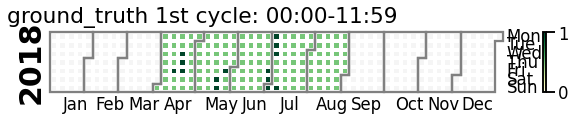

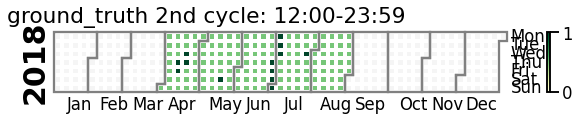

In [30]:
calplot.calplot(ground_truth.between_time(between(2)[0],between(2)[1]),yearlabel_kws={'color': 'black'}, cmap='YlGn', suptitle='ground_truth 1st cycle: 00:00-11:59', linewidth=2.3,dropzero=True,vmin=0) 
calplot.calplot(ground_truth.between_time(between(2)[2],between(2)[3]),yearlabel_kws={'color': 'black'}, cmap='YlGn', suptitle='ground_truth 2nd cycle: 12:00-23:59', linewidth=2.3,dropzero=True,vmin=0)

In [39]:
# clustering--> soft-dtw
# clustering_euclidean
#clustering_dtw
# EXPERIMENT:
# initialization of the list 
#adjusted rand index
ARI=[]
#precision
Precision=[]
#recall
Recall=[]
# f1-score
F1=[]
# number of periods inside 1st cluster
len_1=[]
# number of periods inside 2nd cluster 
len_2=[]
for i in range(49):
    #print(datetime.datetime.now())
    result=clustering(df1.iloc[:,i],131040/220320,720,2,'1min')
    print(result[5])
    len_1.append(len(result[3]))
    len_2.append(len(result[4]))
    print('ARI:',adjusted_rand_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    ARI.append(adjusted_rand_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    print('Precision:',precision_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    Precision.append(precision_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    print('Recall:',recall_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    Recall.append(recall_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    print('F1-score:',f1_score(true_label.values.astype(int)[-len(result[1]):], result[1]))
    F1.append(f1_score(true_label.values.astype(int)[-len(result[1]):], result[1]))


sensor_00
ARI: 0.9340680056934999
Precision: 1.0
Recall: 0.9
F1-score: 0.9473684210526316
sensor_01
ARI: 0.013551304005026302
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_02
ARI: 0.34295980968149614
Precision: 0.34782608695652173
Recall: 0.8
F1-score: 0.48484848484848486
sensor_03
ARI: 0.457528942815551
Precision: 0.4444444444444444
Recall: 0.8
F1-score: 0.5714285714285714
sensor_04
ARI: 0.9340680056934999
Precision: 1.0
Recall: 0.9
F1-score: 0.9473684210526316
sensor_05
ARI: 0.4126806264821231
Precision: 1.0
Recall: 0.3
F1-score: 0.4615384615384615
sensor_06
ARI: 0.8637289589364211
Precision: 1.0
Recall: 0.8
F1-score: 0.888888888888889
sensor_07
ARI: 0.7882317139501227
Precision: 1.0
Recall: 0.7
F1-score: 0.8235294117647058
sensor_08
ARI: 0.7882317139501227
Precision: 1.0
Recall: 0.7
F1-score: 0.8235294117647058
sensor_09
ARI: 0.7882317139501227
Precision: 1.0
Recall: 0.7
F1-score: 0.8235294117647058
sensor_10
ARI: 0.6988986103136331
Precision: 0.625
Recall: 1.0
F1-score: 0.7692307

/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_16
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_17
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_18
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_19
ARI: -0.013679530686870282
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_20
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_21
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_22
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_23
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_24
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_25
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_26
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_27
ARI: -0.08128801735505552
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_28
ARI: -0.0091091933498748
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_29
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_30
ARI: -0.08263049552485367
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_31
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_32
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_33
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_34
ARI: -0.047498041076518206
Precision: 0.03571428571428571
Recall: 0.1
F1-score: 0.05263157894736841
sensor_35
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_36
ARI: -0.013679530686870282
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_37
ARI: -0.013679530686870282
Precision: 0.0
Recall: 0.0
F1-score: 0.0
sensor_38
ARI: 0.02495692972745005
Precision: 0.1111111111111111
Recall: 0.1
F1-score: 0.10526315789473685
sensor_39
ARI: 0.1559466498303212
Precision: 1.0
Recall: 0.1
F1-score: 0.18181818181818182
sensor_40
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_41
ARI: -0.006080864528146853
Precision: 0.07692307692307693
Recall: 0.2
F1-score: 0.1111111111111111
sensor_42
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_43
ARI: 0.0
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/nico_ronzo/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


sensor_44
ARI: 0.014272630132804153
Precision: 0.14516129032258066
Recall: 0.9
F1-score: 0.25
sensor_45
ARI: 0.05886618122790619
Precision: 0.16666666666666666
Recall: 0.1
F1-score: 0.125
sensor_46
ARI: 0.1512081460824462
Precision: 0.21621621621621623
Recall: 0.8
F1-score: 0.3404255319148936
sensor_47
ARI: 0.1512081460824462
Precision: 0.21621621621621623
Recall: 0.8
F1-score: 0.3404255319148936
sensor_48
ARI: 0.8828148262347513
Precision: 0.8333333333333334
Recall: 1.0
F1-score: 0.9090909090909091
sensor_49
ARI: -0.05852297026582934
Precision: 0.0
Recall: 0.0
F1-score: 0.0


In [40]:
# store result in a dataframe 
result=pd.DataFrame(data=None, columns=['size k=1','size k=2','ARI','Precision','Recall','F1-score'],index=df1.columns)
result=result[:-1]

In [41]:
result['ARI']=ARI
result['Precision']=Precision
result['Recall']=Recall
result['F1-score']=F1
result['size k=1']=len_1
result['size k=2']=len_2

In [42]:
result

,size k=1,size k=2,ARI,Precision,Recall,F1-score
sensor_00,115,9,0.934068,1.000000,0.9,0.947368
sensor_01,64,60,0.013551,0.000000,0.0,0.000000
sensor_02,23,101,0.342960,0.347826,0.8,0.484848
sensor_03,18,106,0.457529,0.444444,0.8,0.571429
sensor_04,9,115,0.934068,1.000000,0.9,0.947368
sensor_05,121,3,0.412681,1.000000,0.3,0.461538
sensor_06,116,8,0.863729,1.000000,0.8,0.888889
sensor_07,117,7,0.788232,1.000000,0.7,0.823529
sensor_08,117,7,0.788232,1.000000,0.7,0.823529
sensor_09,7,117,0.788232,1.000000,0.7,0.823529


In [ ]:
# save result in a csv file. 
result.to_csv('/mnt/c/Users/NicolaRonzoni/OneDrive - BitBang Srl/pump-sensor-data/result.csv',sep=',')